# Mnist Dataset

### Importa as funções que vamos utilizar

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score

from tensorflow.keras.models import model_from_json
import numpy as np
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt

### Criar o modelo
Documentação:
    - Conv2D: https://keras.io/layers/convolutional/
    - MaxPooling2D: https://keras.io/layers/pooling/
    - Dense e Flatten: https://keras.io/layers/core/
    - compile: https://keras.io/models/sequential/
    - Optimizer: https://keras.io/optimizers/

In [2]:
classificador = Sequential()

classificador.add(
    Conv2D(
        filters=32,
        kernel_size=(3,3), 
        input_shape=(28, 28, 1), 
        activation = 'relu'
    ))

classificador.add(
    BatchNormalization())

classificador.add(
    MaxPooling2D(
        pool_size=(2,2)
    ))

classificador.add(
    Conv2D(
        filters=32,
        kernel_size=(3,3), 
        input_shape=(28, 28, 1), 
        activation = 'relu'
    ))

classificador.add(
    BatchNormalization())

classificador.add(
    MaxPooling2D(
        pool_size=(2,2)
    ))

classificador.add(
    Flatten())

classificador.add(
    Dense(
        units=128, 
        activation = 'relu'
         ))

classificador.add(
    Dropout(
        rate=0.2
    ))

classificador.add(
    Dense(
        units=128, 
        activation = 'relu'
         ))

classificador.add(
    Dropout(
        rate=0.2
    ))

classificador.add(
    Dense(
        units = 10, # Número de classes
        activation = 'softmax'
    ))

classificador.compile(
    loss='categorical_crossentropy', # categorical_crossentropy porque estamos trabalhando com um problema de mais de 2 classes
    optimizer='adam', # sgd ou adam
    metrics=['accuracy']
)

classificador.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0

### Criar o gerador de imagens
O Gerador é responsável por ler as imagens e fornecer para nossa rede neural, podendo ou não realziar data augmentation

https://keras.io/preprocessing/image/

In [3]:
gerador_treinamento = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 7,
    horizontal_flip = True,
    shear_range = 0.2,
    height_shift_range = 0.07,
    zoom_range = 0.2)

gerador_teste = ImageDataGenerator(rescale = 1./255)

In [4]:
base_treinamento = gerador_treinamento.flow_from_directory(
    directory='datasets/mnist/train',
    target_size = (28, 28),
    batch_size = 1024,
    color_mode='grayscale',
    class_mode='categorical'
)

base_teste = gerador_teste.flow_from_directory(
    directory='datasets/mnist/test',
    target_size = (28, 28),
    batch_size = 1024,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=False
)

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


### Treina a rede neural
https://keras.io/models/sequential/

In [5]:
history = classificador.fit(
    x = base_treinamento,
    validation_data = base_teste,
    epochs = 20,
    verbose = 1
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 59 steps, validate for 10 steps
Epoch 1/20
59/59 [==============================] - 68s 1s/step - loss: 0.9866 - accuracy: 0.6726 - val_loss: 2.0404 - val_accuracy: 0.1860
Epoch 2/20
59/59 [==============================] - 40s 686ms/step - loss: 0.3462 - accuracy: 0.8902 - val_loss: 2.6357 - val_accuracy: 0.1475
Epoch 3/20
59/59 [==============================] - 26s 438ms/step - loss: 0.2284 - accuracy: 0.9294 - val_loss: 3.4264 - val_accuracy: 0.1390
Epoch 4/20
59/59 [==============================] - 26s 444ms/step - loss: 0.1830 - accuracy: 0.9443 - val_loss: 2.9235 - val_accuracy: 0.2191
Epoch 5/20
59/59 [==============================] - 26s 443ms/step - loss: 0.1542 - accuracy: 0.9531 - val_loss: 2.4514 - val_accuracy: 0.3285
Epoch 6/20
59/59 [==============================] - 26s 437ms/step - loss: 0.1355 - accuracy: 0.9582 - val_loss: 0.9524 - val_accuracy: 0.6757
Epoch 7/20
59/59 [==============================] - 2

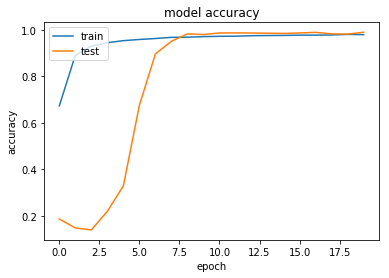

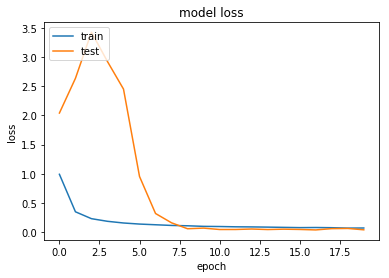

In [6]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Avaliar o modelo

In [7]:
# Reinicia o gerador de imagem de teste 
base_teste.reset()

# Faz a previsão dsa imagens de teste usando o modelo
previsao = classificador.predict(base_teste)
print(f"Probabilidade da primeira imagem pertencer a cada classe: {previsao[0]}")

# Retorna a classe com maior probabilidade
previsao = np.argmax(previsao, axis=1)
print(f"Classe da primeira imagem: {previsao[0]}\n\n")

Probabilidade da primeira imagem pertencer a cada classe: [9.9999368e-01 6.3454603e-11 2.0945905e-08 4.2229827e-11 3.3129968e-10
 2.9251555e-09 1.4487068e-08 5.5521053e-08 1.0605559e-08 6.1359056e-06]
Classe da primeira imagem: 0




In [8]:
print('Confusion Matrix')
print(confusion_matrix(base_teste.classes, previsao))

print(f'\nAccuracy {accuracy_score(base_teste.classes, previsao)}')

print(f'\nBalanced Accuracy {balanced_accuracy_score(base_teste.classes, previsao)}')

print('\nClassification Report')
print(classification_report(base_teste.classes, previsao, target_names=base_treinamento.class_indices.keys()))

Confusion Matrix
[[ 975    0    1    0    0    0    1    2    0    1]
 [   0 1122    3    0    3    0    2    2    3    0]
 [   1    0 1020    0    2    3    2    3    1    0]
 [   0    0    1 1003    0    4    0    0    2    0]
 [   0    0    0    0  977    0    0    1    2    2]
 [   0    0    4    2    0  881    2    2    1    0]
 [   0    1    5    0    1    4  946    0    1    0]
 [   0    0    5    1    1    2    0 1019    0    0]
 [   0    0    2    2    0    0    0    0  969    1]
 [   1    0    1    1    8    4    1    4    8  981]]

Accuracy 0.9893

Balanced Accuracy 0.9893297448542133

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.98      

### Salvar a rede neural

In [9]:
classificador_json = classificador.to_json()
with open('classificador_mnist.json', 'w') as json_file:
    json_file.write(classificador_json)
classificador.save_weights('classificador_mnist.h5')

### Ler a rede neural salva

In [10]:
arquivo = open('classificador_mnist.json', 'r')
estrutura_rede = arquivo.read()
arquivo.close()

classificador = model_from_json(estrutura_rede)
classificador.load_weights('classificador_mnist.h5')

In [11]:
classificador.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0

### Testar com uma imagem nova

In [12]:
## Ler a imagem

imagem_teste = image.load_img(
    path='datasets/mnist/test/0/3.png',
    grayscale=True,
    target_size = (28,28)
)
## Converter para matriz de números
imagem_teste = image.img_to_array(imagem_teste)

## Deixar os valores dos pixels [0,1], igual feito no rescale do ImageDataGenerator
imagem_teste /= 255
imagem_teste = np.expand_dims(imagem_teste, axis = 0)

previsao = classificador.predict(imagem_teste)
print(previsao)
print(np.argmax(previsao))

base_treinamento.class_indices

[[9.9316275e-01 7.5305553e-07 3.1294494e-05 1.0923439e-05 6.2324287e-04
  2.3649371e-05 4.8594340e-03 2.5806239e-06 6.0066661e-05 1.2253090e-03]]
0


C:\ProgramData\Anaconda3\envs\PythonGPU\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}